# <p style="text-align: center;"> <a href='https://www.kaggle.com/c/digit-recognizer'>Kaggle competition: Digit Recognizer</a></p>

# Preparation

In [1]:
%matplotlib inline
import logging
import numpy as np
import pandas as pd
import timeit
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

logger = logging.getLogger()
logger.setLevel(logging.INFO)

train_data = pd.read_csv('./train.csv').sample(frac=1)
submission_test_data = pd.read_csv('./test.csv')
pixel_columns = ['pixel' + str(i) for i in range(784)]

X_train, X_test, y_train, y_test = train_test_split(train_data[pixel_columns], train_data['label'], test_size=0.20, random_state=40)

# Create more images

In [2]:
import keras

ModuleNotFoundError: No module named 'keras'

## Train on 80% of data, Test on 20% of data

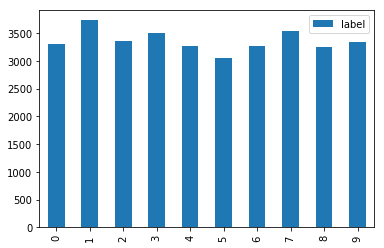

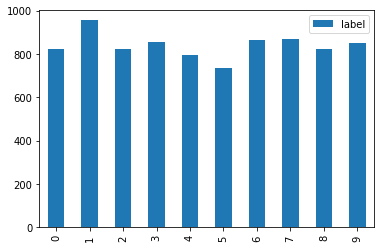

In [6]:
plots = y_train.value_counts().sort_index().to_frame().plot.bar(), y_test.value_counts().sort_index().to_frame().plot.bar()

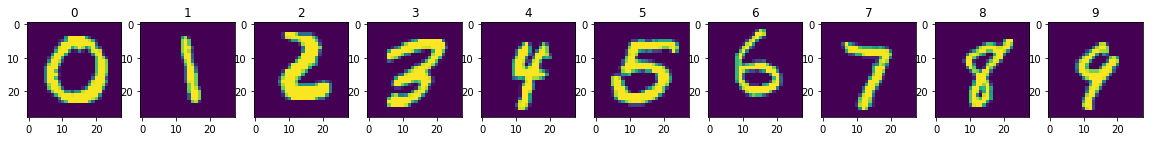

In [6]:
plt.figure(num='digit',figsize=(20, 5))
for idx, row in train_data.sample(frac=1).sort_values(by=['label']).drop_duplicates(subset=['label']).iterrows():
    image = np.array(row[pixel_columns]).reshape([-1,28,28,1])
    plt.subplot(1, 10, row['label'] + 1)
    plt.title(row['label'])
    plt.imshow(np.squeeze(image))

# With Logistic regression (SOFTMax)

In [3]:
from sklearn.linear_model import LogisticRegression
s = timeit.default_timer()
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

y_prediction = clf.predict(X_test)
e = timeit.default_timer()
print("Time: %fs" % (e-s))
precision_recall_fscore_support(y_test, y_prediction, average='macro'), precision_recall_fscore_support(y_test, y_prediction, average='micro')

Time: 10


/home/rictus/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


((0.9183254860641885, 0.9185317893322484, 0.9182783017605785, None),
 (0.9196428571428571, 0.9196428571428571, 0.9196428571428571, None))

In [44]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Using SVM

In [7]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo', kernel='poly', degree=2)
s = timeit.default_timer()
logger.info("Training")
clf.fit(X_train, y_train)
logger.info("Predict")
y_prediction = clf.predict(X_test)
logger.info("Metrics") 
e = timeit.default_timer()
print("Time: %fs" % (e-s))
precision_recall_fscore_support(y_test, y_prediction, average='macro'), precision_recall_fscore_support(y_test, y_prediction, average='micro')

/home/rictus/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


Time: 144.783769s


((0.974719408630567, 0.9746003264224086, 0.9746276430931324, None),
 (0.975, 0.975, 0.975, None))

Polynomial SVC performs well : around 97% of precision and recall. Using a degree of 2 might be related with the fact that we are working with 2d images.

# Second try, K-Nearest neighbor

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Third try, CNN